# TASK #1: UNDERSTAND THE PROBLEM STATEMENT/GOAL



- This dataset contains weekly sales from 99 departments belonging to 45 different stores. 
- Our aim is to forecast weekly sales from a particular department.
- The objective of this case study is to forecast weekly retail store sales based on historical data.
- The data contains holidays and promotional markdowns offered by various stores and several departments throughout the year.
- Markdowns are crucial to promote sales especially before key events such as Super Bowl, Christmas and Thanksgiving. 
- Developing accurate model will enable make informed decisions and make recommendations to improve business processes in the future. 
- The data consists of three sheets: 
    - Stores
    - Features
    - Sales
- Data Source : https://www.kaggle.com/manjeetsingh/retaildataset

# TASK #2: IMPORT DATASET AND LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [7]:
df = pd.read_csv('../data/data_processed.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,Type,Size
0,1,1,2010-05-02,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,A,151315
1,1,2,2010-05-02,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,A,151315
2,1,3,2010-05-02,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,A,151315
3,1,4,2010-05-02,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,A,151315
4,1,5,2010-05-02,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,A,151315


In [8]:
# Drop the date
y = df['Weekly_Sales'] # target
X = df.drop(columns = ['Weekly_Sales', 'Date']) # features

In [9]:
X = pd.get_dummies(X, columns = ['Type', 'Store', 'Dept'], drop_first = True)

In [10]:
X.shape

(421570, 138)

In [11]:
y.shape

(421570,)

In [12]:
X.head()

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
2,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
3,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
4,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# save columnames for later purposes
featurenames = list(X.columns)

In [14]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [15]:
# reshaping the array from (421570,) to (421570, 1)
y = y.reshape(-1,1)
y.shape

(421570, 1)

In [16]:
# spliting the data into train, validation and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [17]:
X_train.shape

(210785, 138)

In [18]:
X_val.shape

(105393, 138)

In [19]:
X_test.shape

(105392, 138)

# Load trained model

In [20]:
from joblib import dump, load

In [21]:
# load saved model and check functionality
tuned_model = load('../model/tuned_xgb_model.joblib')

In [22]:
# make predictions on the test data
y_predict = tuned_model.predict(X_test)
y_predict

array([10284.46 ,  7524.151, 14610.147, ..., 14610.147, 14610.147,
        7524.151], dtype=float32)

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 14243.31 
MSE = 202871870.0 
MAE = 9766.422 
R2 = 0.6052151843421913 
Adjusted R2 = 0.6046975714992247


# Model Interpretability

In [25]:
feature_importance = pd.DataFrame(data=tuned_model.feature_importances_,
                                columns=['feature importance'],
                                index=featurenames).sort_values('feature importance')
feature_importance
#.hist()
#plt.show()

,feature importance
Dept_12,0.000000
Dept_41,0.000000
Dept_39,0.000000
Dept_37,0.000000
Dept_36,0.000000
...,...
Dept_40,0.063479
Dept_2,0.066282
Dept_38,0.092446
Dept_95,0.133286


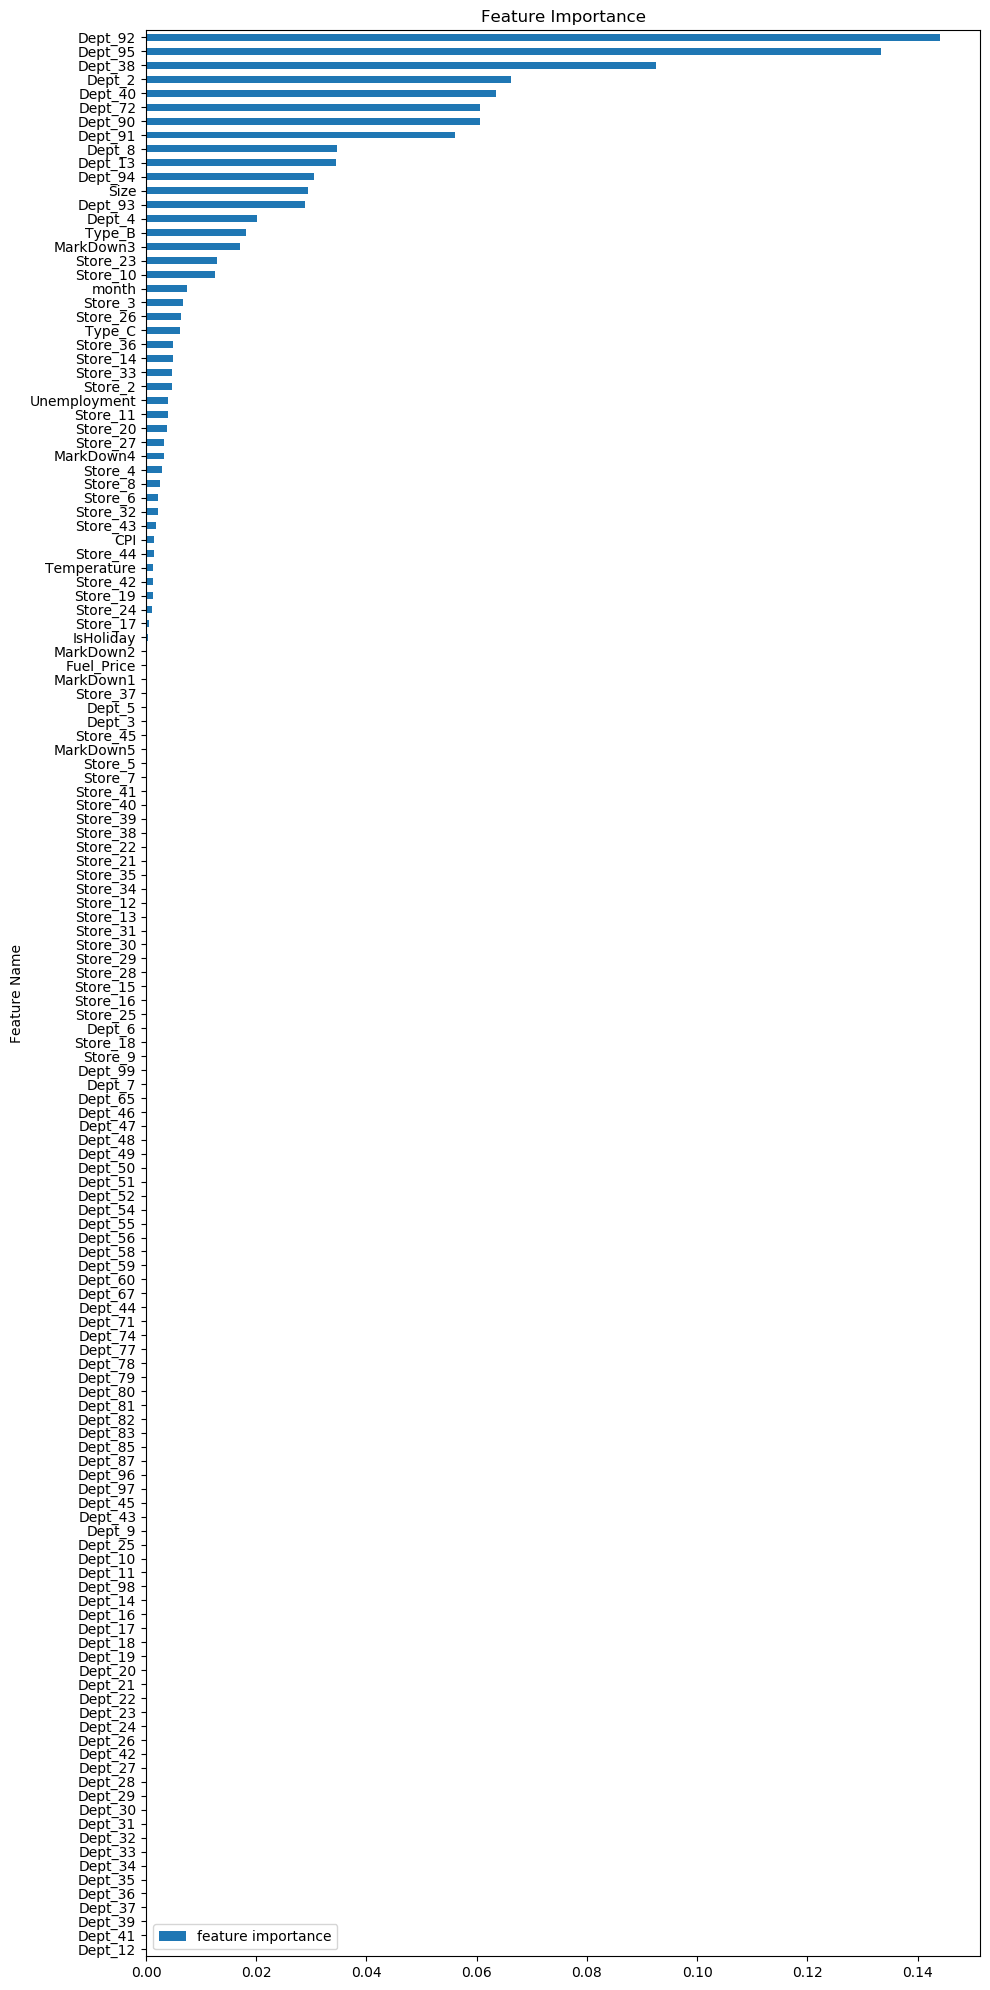

In [34]:
fig, ax = plt.subplots(figsize=(10,20))
feature_importance.plot.barh(ax=ax)
ax.set_title("Feature Importance")
ax.set_ylabel("Feature Name")
fig.tight_layout()
plt.show()